Module 1 Final Project: Using multivariate linear regression to predict King County House Sales
    

Data Science proccess using OSEMiN framework 

Obtain: Problem/deliverables, KC housing data is already given as csv file, 
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
hd = pd.read_csv("kc_house_data.csv") #load in all data using pandas read csv 

In [3]:
hd.head() # check to ensure csv was loaded in correctly  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Data cleaning, look at data types, look for missing null values and placeholder/filler data, sparse columns

Scrub: preprocessing data dentifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection and one hot encoding 

In [126]:
hd.info() # checking data types, two objects the rest are all float and ints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id                  21597 non-null int64
price               21597 non-null float64
bedrooms            21596 non-null float64
bathrooms           21597 non-null float64
sqft_living         21597 non-null float64
sqft_lot            21597 non-null float64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null uint8
condition           21597 non-null float64
grade               21597 non-null float64
sqft_above          21597 non-null float64
sqft_basement       21597 non-null uint8
yr_built            21597 non-null float64
zipcode             21597 non-null uint8
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null float64
sqft_lot15          21597 non-null float64
bath_per_bedroom    21596 non-null float64
dtypes: float64(16), int64(1), uint8(3)

In [5]:
hd.isna().sum() # check total null values, found nulls in waterfront, view and yr_renovated 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
hd.describe() # check 5 points stats of all columns 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


look for suspected categorical values, check scatter plot relationship with price for each predictior  

In [8]:
hd_features = list(hd.columns)  
hd_features.remove("sqft_basement") # removed sqft_basement since cannot plot object type in a scatter plot
print(hd_features)    

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


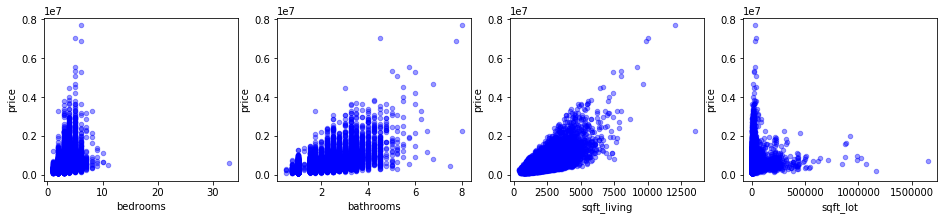

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(hd_features)[2:6], axes):
    hd.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

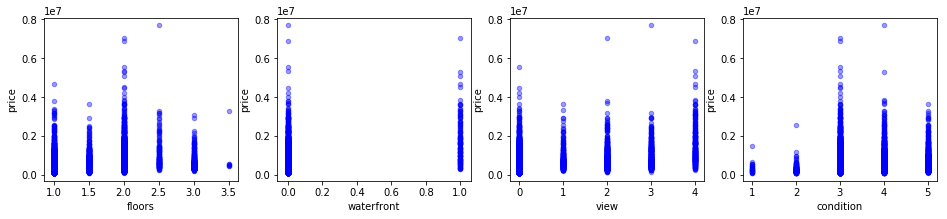

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(hd_features)[6:10], axes):
    hd.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

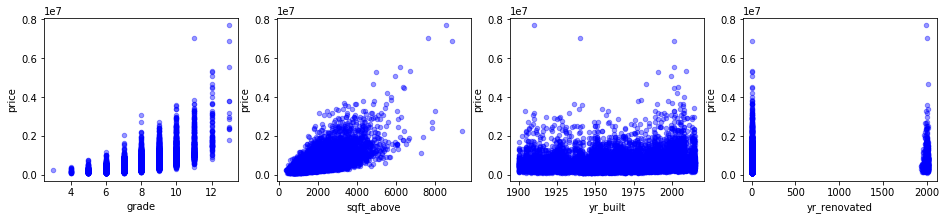

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(hd_features)[10:14], axes):
    hd.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

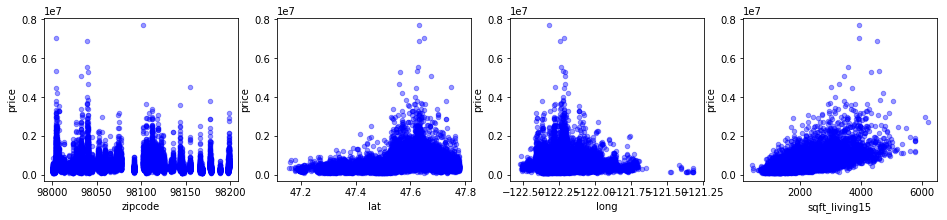

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(hd_features)[14:18], axes):
    hd.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

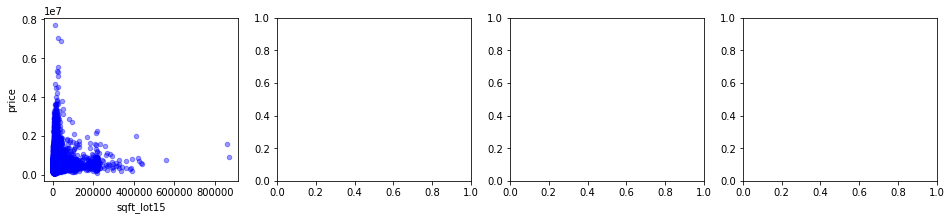

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(hd_features)[18:20], axes):
    hd.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

In [14]:
len(hd) # check number of rows in dataframe

21597

In [15]:
hd.price.unique() 

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [16]:
hd.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

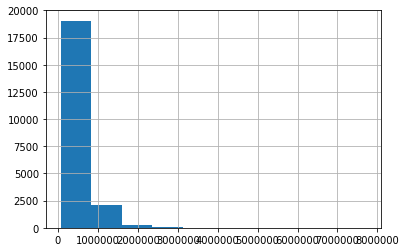

In [17]:
hd.price.hist()

In [18]:
hd.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

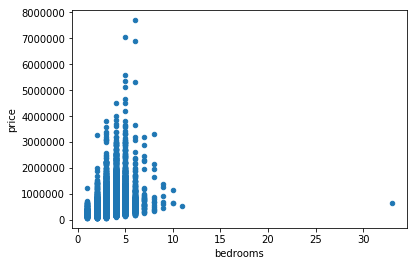

In [19]:
hd.plot(kind='scatter',x= "bedrooms", y="price" )

In [20]:
hd.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [21]:
hd.loc[hd["bedrooms"] == 33] # look at entire bedroom outlier row , house this big would need more bathrooms

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [22]:
hd["bedrooms"] = hd["bedrooms"].drop(hd["bedrooms"].idxmax()) # get max index id, drop max bedroom value  

In [23]:
hd.bathrooms.unique() 

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

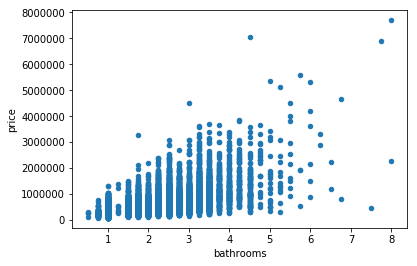

In [24]:
hd.plot(kind='scatter',x= "bathrooms", y="price" )

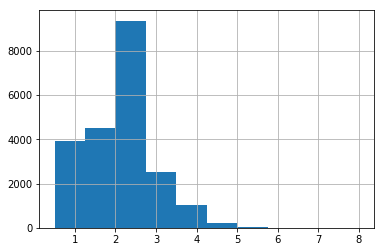

In [25]:
hd.bathrooms.hist()

In [26]:
hd.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [27]:
hd[hd.bathrooms == 8]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,7700000.0,6.0,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,2280000.0,7.0,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [28]:
hd.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [29]:
hd.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [30]:
hd.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

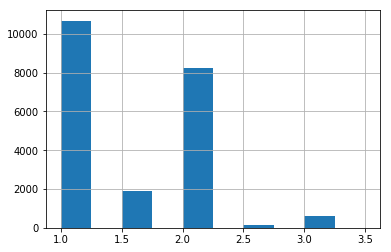

In [31]:
hd.floors.hist()

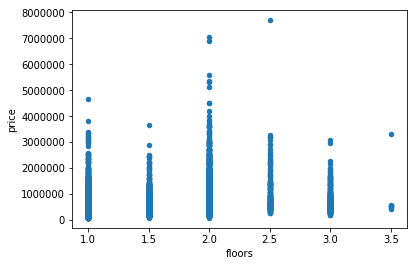

In [32]:
hd.plot(kind='scatter',x= "floors", y="price" )

In [33]:
# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 1.0 , 1.5, 2.0, 2.5, 3.0, 3.5]
# use pd.cut
bins_floors = pd.cut(hd['floors'], bins)
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_floors = bins_floors.cat.as_unordered()
bins_floors.head()

0    (0.0, 1.0]
1    (1.5, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (6, interval[float64]): [(0.0, 1.0], (1.0, 1.5], (1.5, 2.0], (2.0, 2.5], (2.5, 3.0], (3.0, 3.5]]

In [34]:
bins_floors.value_counts()

(0.0, 1.0]    10673
(1.5, 2.0]     8235
(1.0, 1.5]     1910
(2.5, 3.0]      611
(2.0, 2.5]      161
(3.0, 3.5]        7
Name: floors, dtype: int64

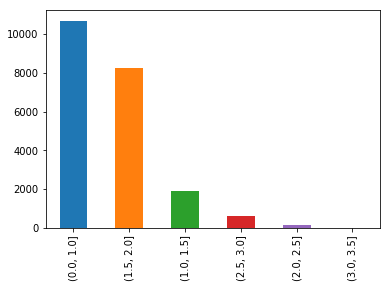

In [35]:
bins_floors.value_counts().plot(kind='bar')

In [36]:
hd.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [37]:
hd.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [38]:
hd.waterfront.unique() # waterfront appears binary already categorical 

array([nan,  0.,  1.])

In [39]:
hd.waterfront.isna().sum()/hd.waterfront.count() * 100
  # find percent of null values in waterfront

12.36147963165288

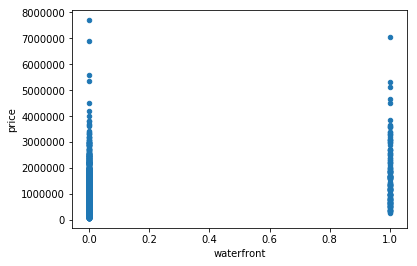

In [40]:
hd.plot(kind='scatter',x= "waterfront", y="price" ) # Scatter plot of waterfront relationship with price

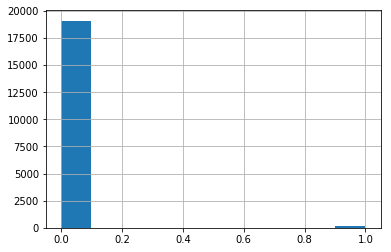

In [41]:
hd.waterfront.hist() # check hist of waterfront, waterfront properties 

Replace null values with 0, null values assumed to be not waterfront, might slighlty skew data and better than removing rows 

In [42]:
hd.waterfront = hd.waterfront.fillna(value= 0) # used pandas fill na to repace nulls with 0 

In [43]:
hd.isna().sum()

id                  0
price               0
bedrooms            1
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [44]:
hd.waterfront.head() # first null value successfully replaced  

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

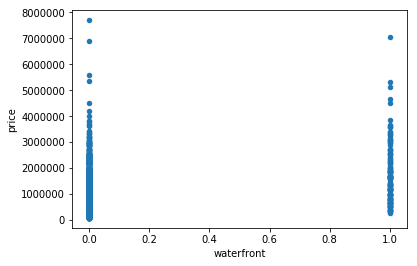

In [45]:
hd.plot(kind='scatter',x= "waterfront", y="price" )

In [46]:
hd[hd.waterfront == 0].describe() # check all non waterfront houses

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.145100e+04,2.145100e+04,21450.000000,21451.000000,21451.000000,2.145100e+04,21451.000000,21451.0,21389.000000,21451.000000,21451.000000,21451.000000,21451.000000,17634.000000,21451.000000,21451.000000,21451.000000,21451.000000,21451.000000
mean,4.581329e+09,5.322862e+05,3.371981,2.111790,2072.396485,1.502610e+04,1.493170,0.0,0.209781,3.408932,7.649900,1783.695259,1971.059018,80.940172,98077.824157,47.560232,-122.213546,1981.881777,12689.299753
std,2.876910e+09,3.428082e+05,0.902671,0.764493,906.042446,4.138140e+04,0.539522,0.0,0.708551,0.649793,1.163965,821.678720,29.381720,393.753731,53.440658,0.138697,0.140734,681.907132,27287.285949
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.035000e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,1952.000000,0.000000,98033.000000,47.471300,-122.328000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.590000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.572000,-122.229000,1830.000000,7601.000000
75%,7.307250e+09,6.400000e+05,4.000000,2.500000,2540.000000,1.057850e+04,2.000000,0.0,0.000000,4.000000,8.000000,2200.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2356.000000,10025.500000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
hd[hd.waterfront == 1].describe() # check 5 point stats of only waterfront house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,1.781233,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


In [48]:
hd.view.unique() 

array([ 0., nan,  3.,  4.,  2.,  1.])

In [49]:
hd.view.describe() #

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

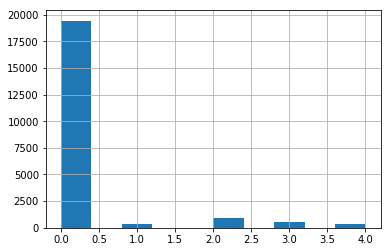

In [50]:
hd.view.hist()

In [51]:
hd.view.value_counts() #

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [52]:
nullcount = hd.view.isna().sum()
nullcount

63

In [53]:
nullcount/hd.view.count() * 100 # only 0.2 percent null

0.2925606018389524

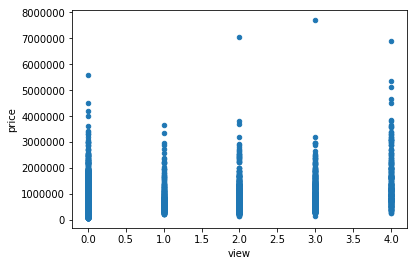

In [54]:
hd.plot(kind='scatter',x= "view", y="price" )

In [55]:
hd.view = hd.view.fillna(value= 0) # dealt with view null values by replacing with 0 

In [56]:
hd.view.isna().sum()

0

In [57]:
hd.isna().sum()

id                  0
price               0
bedrooms            1
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Column names decribes condtion as "How good the condition is ( Overall )" 

In [58]:
hd.condition.unique() 


array([3, 5, 4, 1, 2])

In [59]:
hd.condition.describe() 

count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

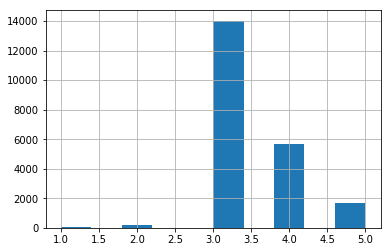

In [60]:
hd.condition.hist()

In [145]:
hd.drop(["condition"], axis = 1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,bath_per_bedroom
0,7129300520,-0.866696,-0.411263,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,1,-0.560787,-0.735234,1,-0.544665,0,-0.352886,-0.305688,-0.943654,-0.260621,3.528255
1,6414100192,-0.006251,-0.411263,0.174482,0.533357,-0.189735,0.937409,-0.082498,1,-0.560787,0.460766,0,-0.680835,0,1.161349,-0.746268,-0.432877,-0.187695,-0.424259
2,5631500400,-0.980751,-1.517318,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,1,-1.413157,-1.230546,1,-1.293596,0,1.283325,-0.135141,1.070267,-0.172186,0.956318
3,2487200875,0.173405,0.694793,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,1,-0.560787,-0.892284,0,-0.204243,0,-0.283598,-1.272122,-0.914467,-0.284453,1.654873
4,1954400510,-0.082469,-0.411263,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,1,0.291583,-0.131194,1,0.544688,0,0.409284,1.200812,-0.272347,-0.192682,0.366244
5,7237550310,1.877418,0.694793,3.100419,3.637573,2.096717,-0.915531,-0.082498,1,2.848692,2.538663,0,1.021279,0,0.692932,1.485057,4.047368,3.269424,4.462364
6,1321400060,-0.769791,-0.411263,0.174482,-0.397908,-0.199949,0.937409,-0.082498,1,-0.560787,-0.088911,0,0.817026,0,-1.807216,-0.803117,0.366854,-0.217760,-0.424259
7,2008000270,-0.676288,-0.411263,-0.800831,-1.111333,-0.130115,-0.915531,-0.082498,1,-0.560787,-0.880203,1,-0.272327,0,-1.086908,-0.717844,-0.491251,-0.111727,1.947249
8,2414600126,-0.846009,-0.411263,-1.451039,-0.327110,-0.184229,-0.915531,-0.082498,1,-0.560787,-0.892284,0,-0.374454,0,-0.344947,-0.874179,-0.301534,-0.170316,3.528255
9,3793500160,-0.591495,-0.411263,0.499586,-0.207298,-0.206203,0.937409,-0.082498,1,-0.560787,0.122503,1,1.089364,0,-1.383548,1.300298,0.588677,-0.190225,-1.214762


Grade is described as "overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement"

In [61]:
hd.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

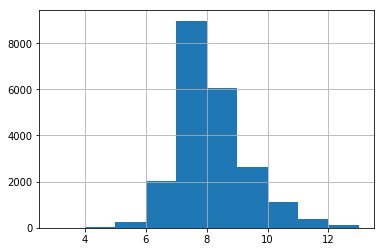

In [62]:
hd.grade.hist() #

In [63]:
hd.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [64]:
hd.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

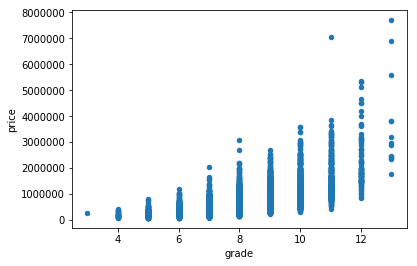

In [65]:
hd.plot(kind='scatter',x= "grade", y="price" ) 

In [66]:
hd.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [67]:
hd.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

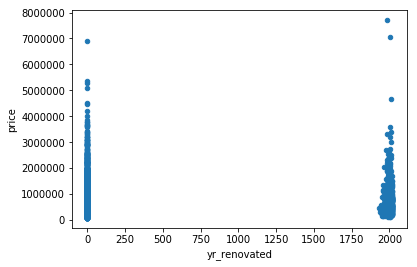

In [68]:
hd.plot(kind='scatter',x= "yr_renovated", y="price" )

In [69]:
print(len(hd[hd.yr_renovated == 0]))
print(len(hd[hd.yr_renovated == 0])/len(hd) * 100) #check if 0 is missing value placeholder

17011
78.7655692920313


In [70]:
hd[hd.yr_renovated == 0].describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.701100e+04,1.701100e+04,17010.000000,17011.000000,17011.000000,1.701100e+04,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000,17011.0,17011.000000,17011.000000,17011.000000,17011.000000,17011.000000
mean,4.591268e+09,5.306775e+05,3.373192,2.112398,2073.659279,1.524147e+04,1.495444,0.005408,0.215390,3.418964,7.657633,1787.751102,1972.492328,0.0,98076.984833,47.558386,-122.211336,1989.954089,12843.540239
std,2.874810e+09,3.504157e+05,0.898028,0.760386,907.913731,4.227023e+04,0.540369,0.073344,0.730812,0.656315,1.169725,825.496535,28.848231,0.0,53.291531,0.139190,0.140976,683.581726,27786.030994
min,1.000102e+06,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.129700e+09,3.200000e+05,3.000000,1.750000,1421.000000,5.054500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1954.000000,0.0,98032.000000,47.466250,-122.326000,1490.000000,5100.000000
50%,3.904990e+09,4.475000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1977.000000,0.0,98065.000000,47.569600,-122.225000,1840.000000,7621.000000
75%,7.334501e+09,6.344000e+05,4.000000,2.500000,2540.000000,1.062150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1998.000000,0.0,98117.000000,47.677600,-122.122000,2370.000000,10072.500000
max,9.895000e+09,6.890000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
hd[hd.yr_renovated > 0].describe() 

In [71]:
#hd = hd.drop('yr_renovated', axis = 1)

In [72]:
hd.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [73]:
hd.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

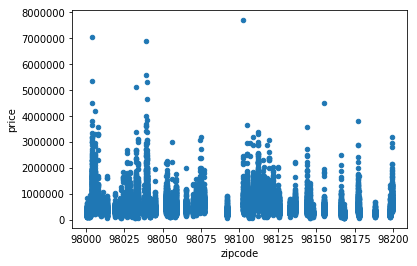

In [74]:
hd.plot(kind='scatter',x= "zipcode", y="price" )

In [75]:
hd.zipcode = hd.zipcode.astype("str") # casted zipcode as a string

Zipcode is clearly a categorical type accidentally encoded as Integer

In [76]:
hd.dtypes # check to ensure categorical columns have been set to binned values 

id                 int64
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [77]:
hd.lat.unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [78]:
hd.lat.describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

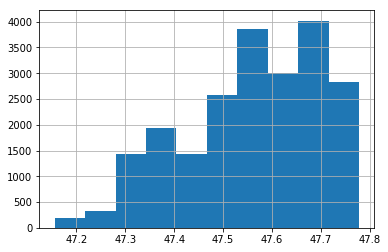

In [79]:
hd.lat.hist()

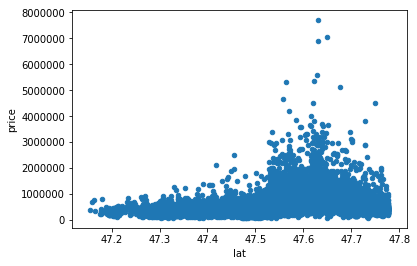

In [80]:
hd.plot(kind='scatter',x= "lat", y="price" )

In [81]:
len(hd.long.unique())

751

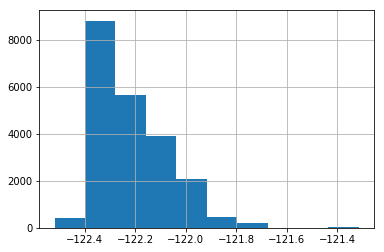

In [82]:
hd.long.hist()

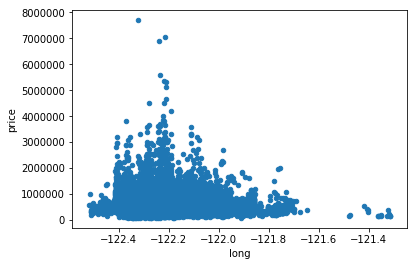

In [83]:
hd.plot(kind='scatter',x= "long", y="price" )

In [84]:
len(hd.sqft_living15.unique())

777

In [85]:
hd.sqft_living15.describe()

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

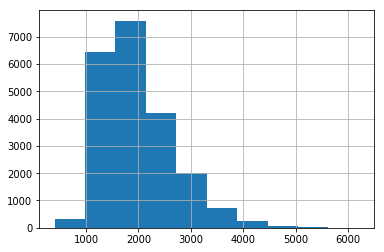

In [86]:
hd.sqft_living15.hist()

In [87]:
hd.sqft_lot15.unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007])

In [88]:
hd.sqft_lot15.describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [89]:
hd[hd.sqft_lot15 == 0] # no suspected 0 as placeholder 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


In [90]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21596 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(9), object(2)
memory usage: 3.1+ MB


In [91]:
len(hd.sqft_above.unique())  

942

In [92]:
hd.sqft_above.describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

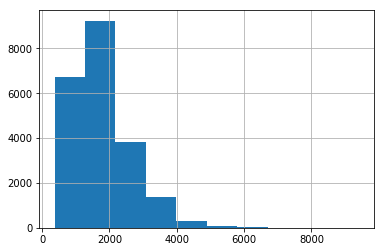

In [93]:
hd.sqft_above.hist()

In [94]:
(hd.sqft_above.max() - hd.sqft_above.mean()) //hd.sqft_above.std() #confirm sqft_above max valueis an outlier

9.0

In [95]:
hd.sqft_basement.head() #sqft_basement is a string object 

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [96]:
hd.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [97]:
#hd["sqft_basement"] = hd["sqft_basement"].astype(float)

In [98]:
len(hd.sqft_basement.unique())

304

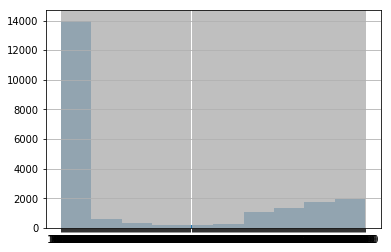

In [99]:
hd.sqft_basement.hist()

In [100]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21596 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(9), object(2)
memory usage: 3.1+ MB


Explore:  checking for multicollinearity, create three visualizations,furtther understanding the distribution of different columns,

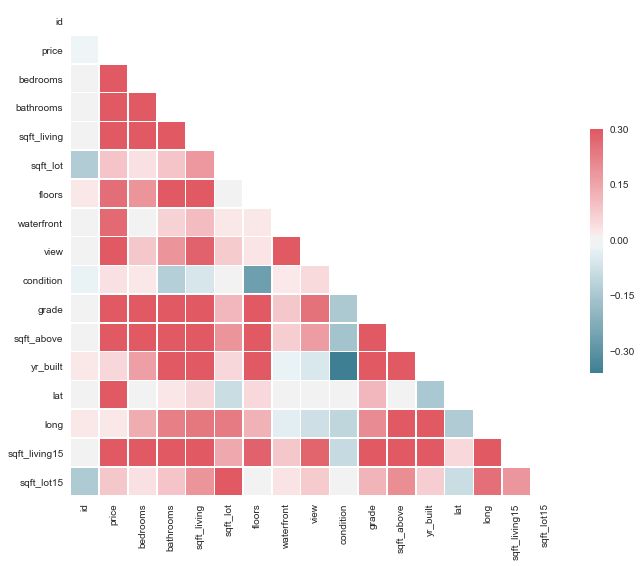

In [101]:
 

#check for correlation matrix 

sns.set(style="white")


corr = hd.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

multicollinearity check : 

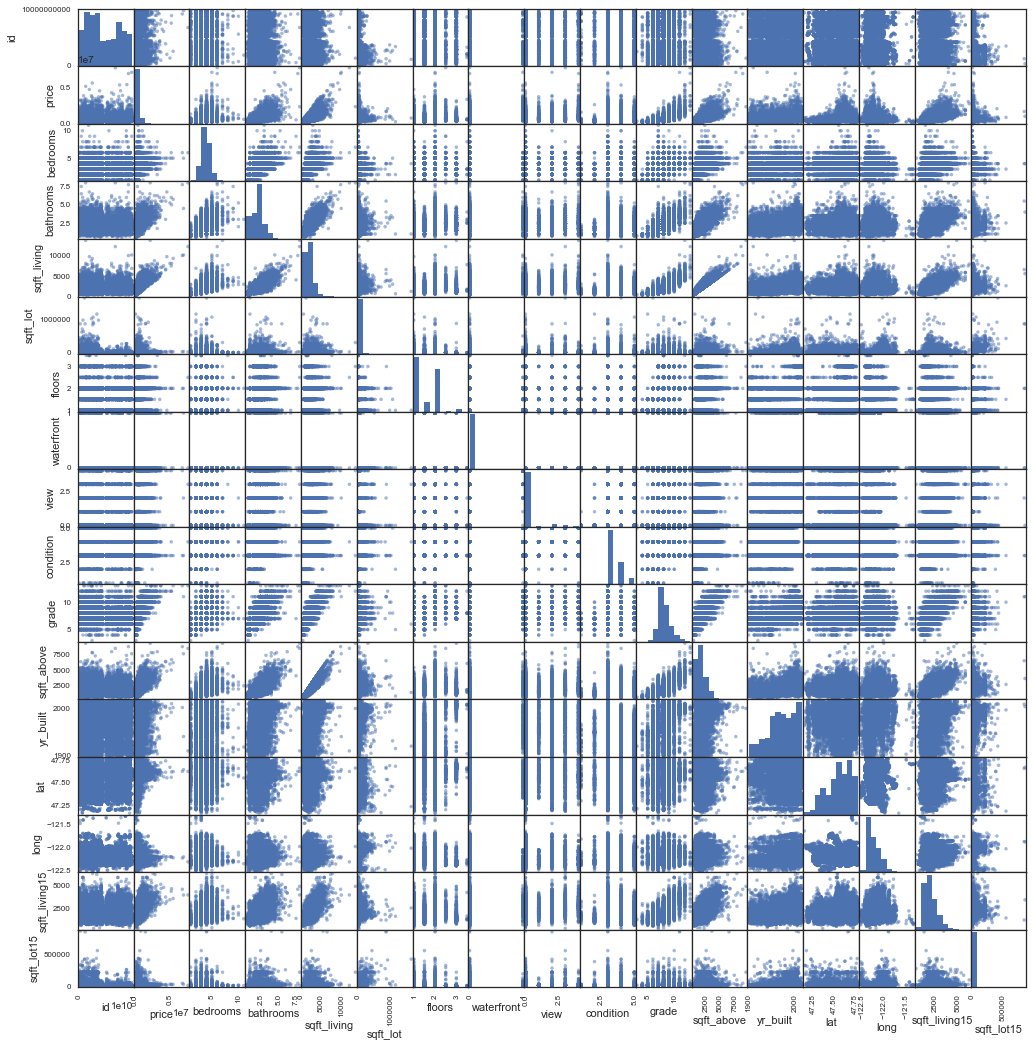

In [102]:
correlation_df = hd 

pd.plotting.scatter_matrix(correlation_df,figsize  = [17, 18]);  #use pandas to generate a scatter matrix to detect pairwise linear relationships

In [103]:
correlation_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.002328,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,0.021617,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.315961,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.306692,0.022036,0.585241,0.082845
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,0.492543,0.160736,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.005162,0.525906,0.527870,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.593178,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.033602,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.183707,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002054,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.080741,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.023440,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.015102,-0.105877,-0.093072,-0.003126


In [104]:
abs(correlation_df.corr()) > 0.75 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


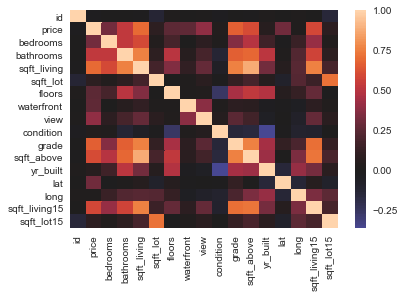

In [105]:
sns.heatmap(correlation_df.corr(), center=0);

Feature Scaling and normalization 

In [106]:



hd.price = (hd.price - hd.price.mean()) / hd.price.std()
hd.bedrooms = (hd.bedrooms - hd.bedrooms.mean()) / hd.bedrooms.std()
hd.bathrooms = (hd.bathrooms - hd.bathrooms.mean()) / hd.bathrooms.std()
hd.sqft_living = (hd.sqft_living - hd.sqft_living.mean()) / hd.sqft_living.std()
hd.sqft_lot = (hd.sqft_lot - hd.sqft_lot.mean()) / hd.sqft_lot.std()
hd.floors = (hd.floors - hd.floors.mean()) / hd.floors.std()

hd.waterfront = (hd.waterfront - hd.waterfront.mean()) / hd.waterfront.std()
hd.condition = (hd.condition - hd.condition.mean()) / hd.condition.std()
hd.grade = (hd.grade - hd.grade.mean()) / hd.grade.std()
hd.sqft_above = (hd.sqft_above - hd.sqft_above.mean()) / hd.sqft_above.std()
hd.yr_built = (hd.yr_built - hd.yr_built.mean()) / hd.yr_built.std()
hd.lat = (hd.lat - hd.lat.mean()) / hd.lat.std()
hd.long = (hd.long - hd.long.mean()) / hd.long.std()
hd.sqft_living15 = (hd.sqft_living15 - hd.sqft_living15.mean()) / hd.sqft_living15.std()
hd.sqft_lot15 = (hd.sqft_lot15 - hd.sqft_lot15.mean()) / hd.sqft_lot15.std()






In [107]:
hd.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,-0.866696,-0.411263,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,0.0,-0.629972,-0.560787,-0.735234,0.0,-0.544665,98178,-0.352886,-0.305688,-0.943654,-0.260621
1,6414100192,-0.006251,-0.411263,0.174482,0.533357,-0.189735,0.937409,-0.082498,0.0,-0.629972,-0.560787,0.460766,400.0,-0.680835,98125,1.161349,-0.746268,-0.432877,-0.187695
2,5631500400,-0.980751,-1.517318,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,0.0,-0.629972,-1.413157,-1.230546,0.0,-1.293596,98028,1.283325,-0.135141,1.070267,-0.172186
3,2487200875,0.173405,0.694793,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,0.0,2.444371,-0.560787,-0.892284,910.0,-0.204243,98136,-0.283598,-1.272122,-0.914467,-0.284453
4,1954400510,-0.082469,-0.411263,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,0.0,-0.629972,0.291583,-0.131194,0.0,0.544688,98074,0.409284,1.200812,-0.272347,-0.192682


one hot encoding 

one hot encoding categorical values 

In [ ]:
hd.view = pd.get_dummies(hd.view)
hd.sqft_basement = pd.get_dummies(hd.sqft_basement)
hd.zipcode = pd.get_dummies(hd.zipcode)


In [ ]:
hd.to_csv("kc_house_data.csv_cleaned", index=False)

In [ ]:
hd.head()

Exploratory Data Analysis

In [111]:
hd.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,2.159600e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,4.580474e+09,-5.372992e-17,1.297865e-16,-2.207430e-15,-1.857928e-16,2.098202e-16,-1.925871e-14,-1.361026e-15,0.902209,2.583457e-15,1.586436e-14,9.608362e-17,0.593879,4.487651e-15,0.016715,2.900251e-13,-4.654050e-12,-1.936580e-16,-1.840605e-16
std,2.876736e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.297039,1.000000e+00,1.000000e+00,1.000000e+00,0.491119,1.000000e+00,0.128205,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000102e+06,-1.258401e+00,-2.623374e+00,-2.101247e+00,-1.862880e+00,-3.520522e-01,-9.155311e-01,-8.249784e-02,0.000000,-3.704314e+00,-3.970267e+00,-1.713778e+00,0.000000,-2.416991e+00,0.000000,-2.917271e+00,-2.167495e+00,-2.316914e+00,-4.439058e-01
25%,2.123049e+09,-5.942175e-01,-4.112625e-01,-4.757266e-01,-7.083297e-01,-2.429067e-01,-9.155311e-01,-8.249784e-02,1.000000,-6.299719e-01,-5.607873e-01,-7.231529e-01,0.000000,-6.808346e-01,0.000000,-6.423086e-01,-8.102234e-01,-7.247493e-01,-2.807861e-01
50%,3.904930e+09,-2.457932e-01,-4.112625e-01,1.744818e-01,-1.855143e-01,-1.806552e-01,1.093901e-02,-8.249784e-02,1.000000,-6.299719e-01,-5.607873e-01,-2.761633e-01,1.000000,1.361802e-01,0.000000,8.449553e-02,-1.209286e-01,-2.139723e-01,-1.883919e-01
75%,7.308900e+09,2.850095e-01,6.947930e-01,4.995859e-01,5.115728e-01,-1.065957e-01,9.374092e-01,-8.249784e-02,1.000000,9.071993e-01,2.915825e-01,5.090887e-01,1.000000,8.851104e-01,0.000000,8.509960e-01,6.323214e-01,5.448965e-01,-9.808756e-02
max,9.900000e+09,1.948918e+01,8.437182e+00,7.651878e+00,1.248187e+01,3.951112e+01,3.716820e+00,1.212097e+01,1.000000,2.444371e+00,4.553432e+00,9.207265e+00,1.000000,1.497871e+00,1.000000,1.569861e+00,6.388288e+00,6.163444e+00,3.147422e+01


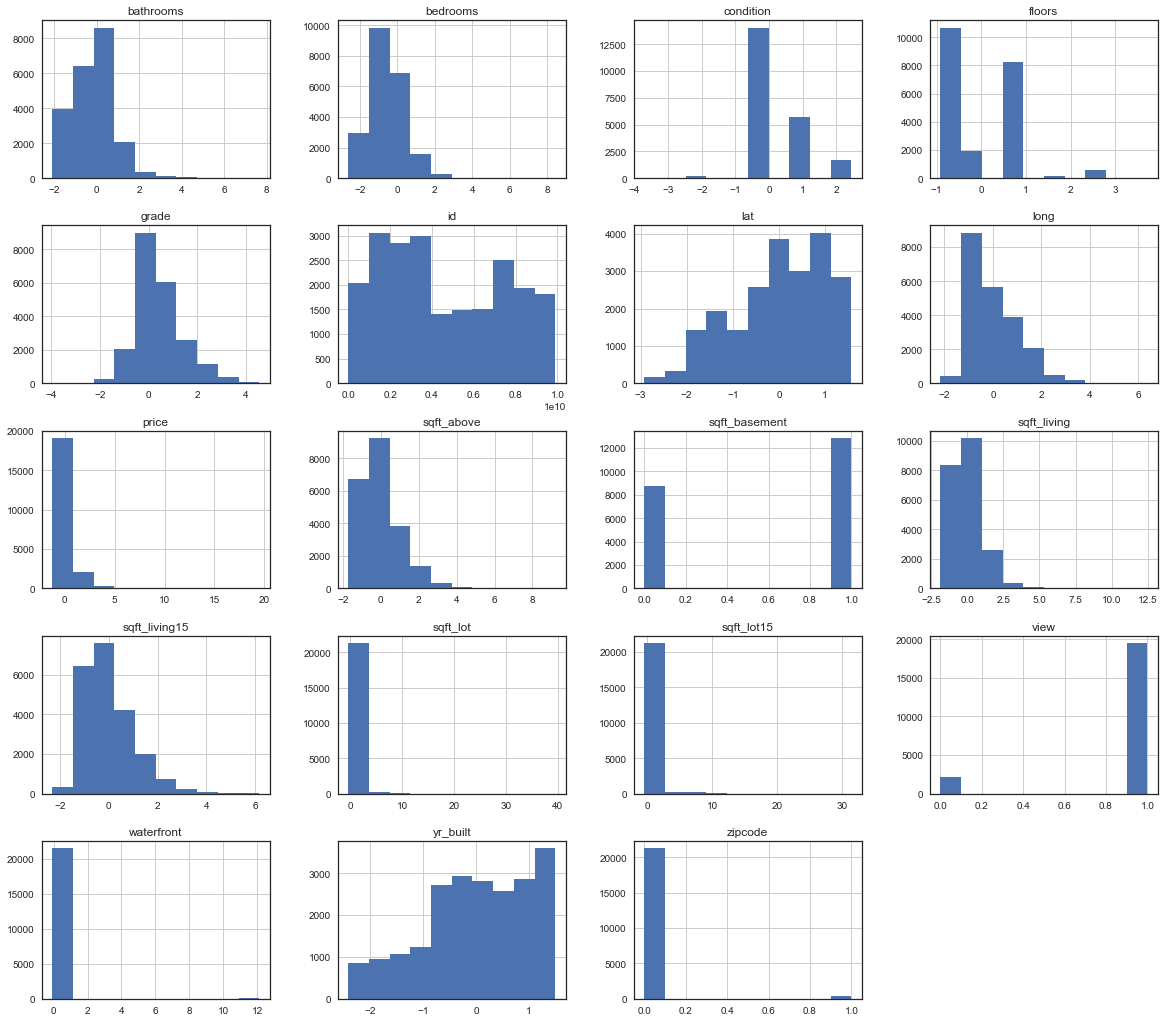

In [112]:
hd.hist(figsize = (20,18));

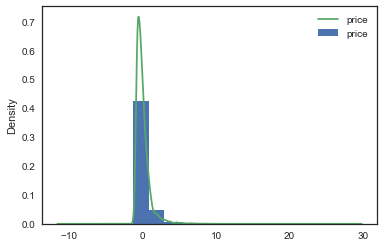

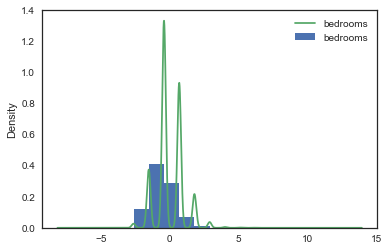

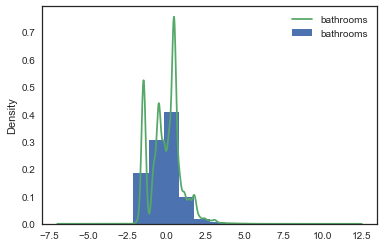

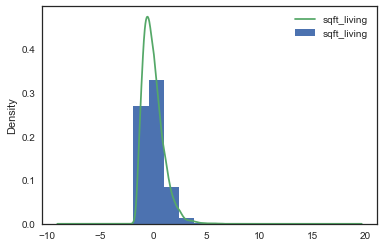

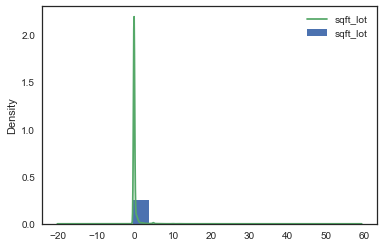

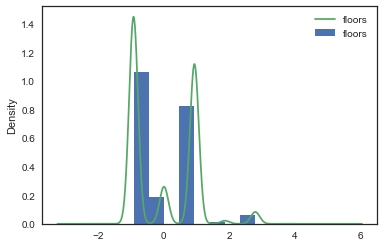

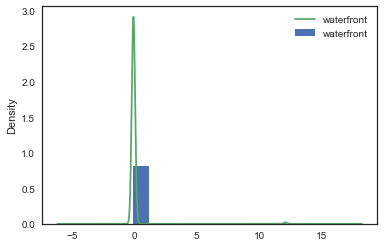

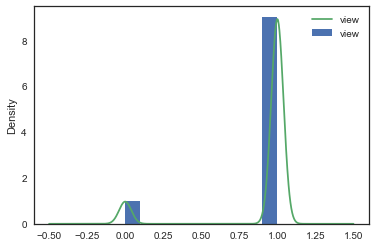

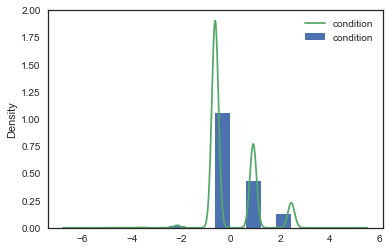

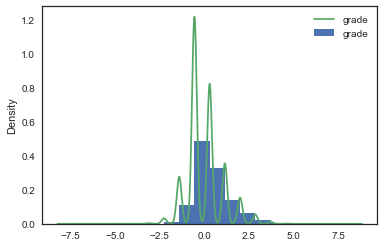

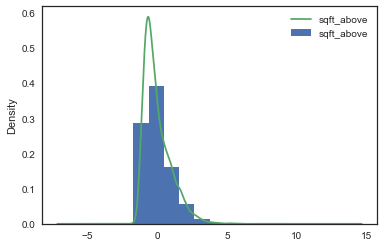

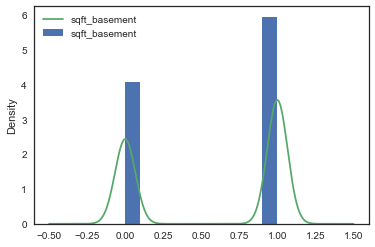

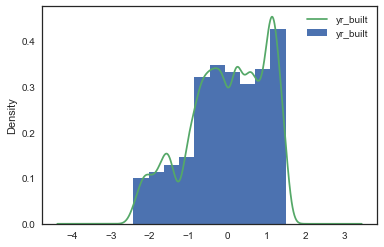

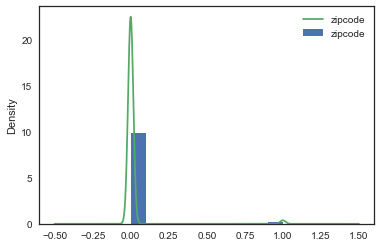

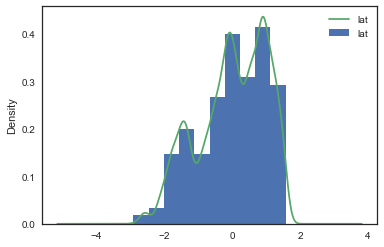

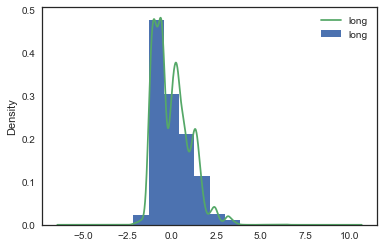

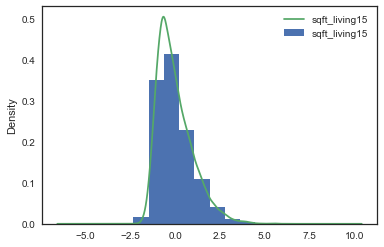

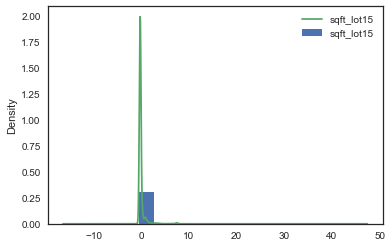

In [113]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']:
    hd[column].plot.hist(normed=True )
    hd[column].plot.kde(label=column )
    plt.legend()
    plt.show()

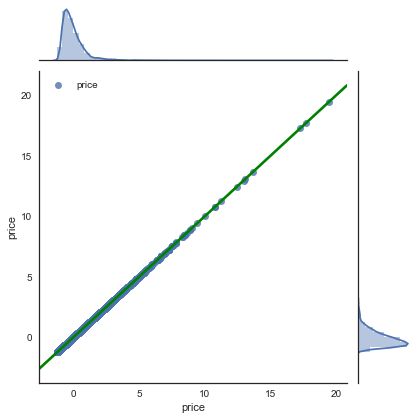

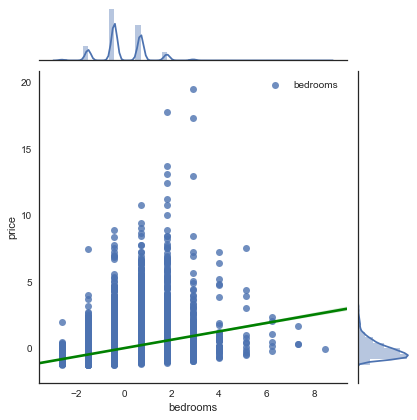

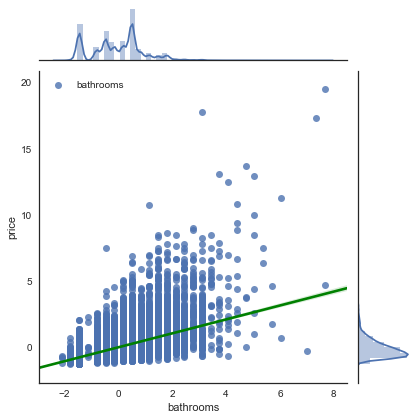

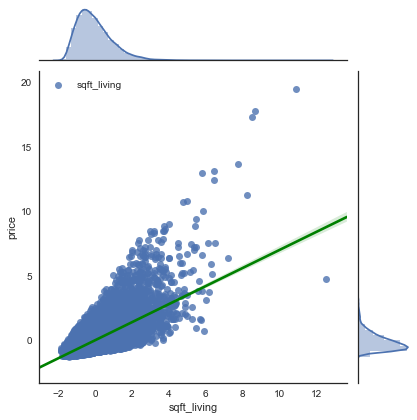

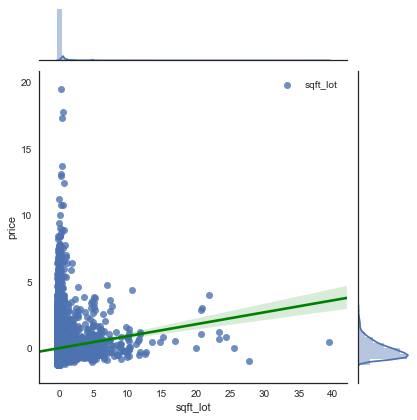

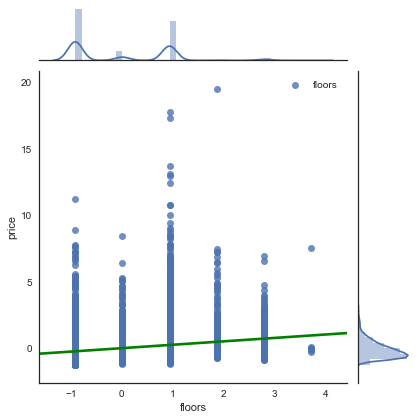

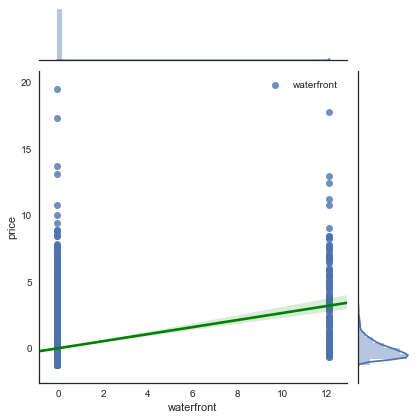

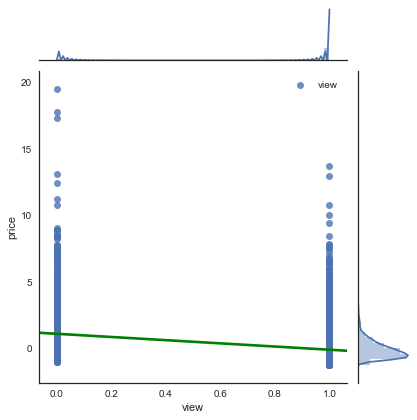

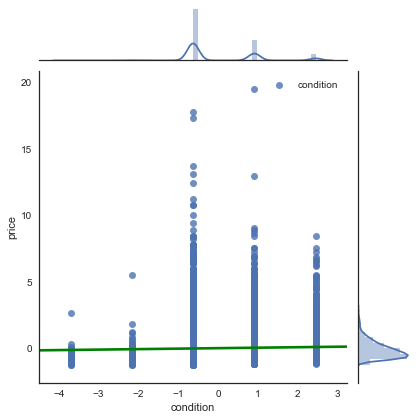

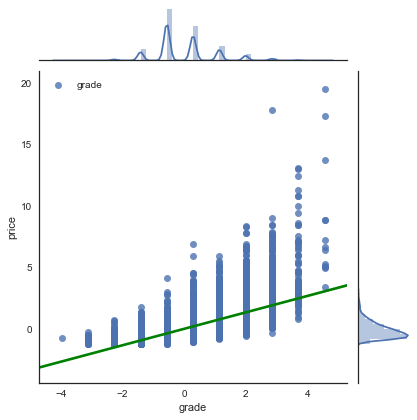

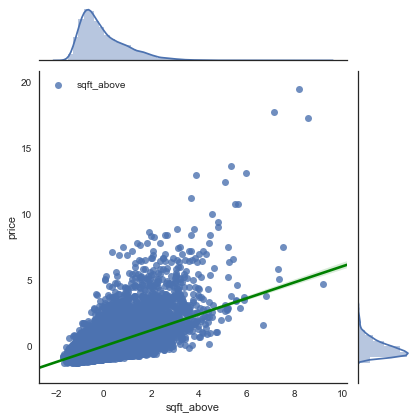

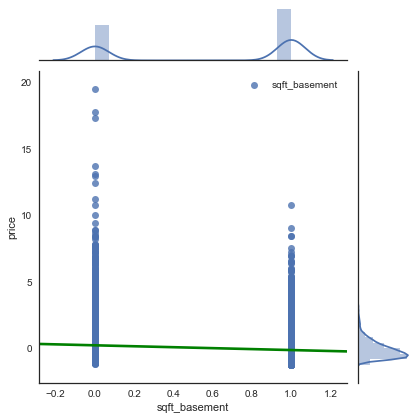

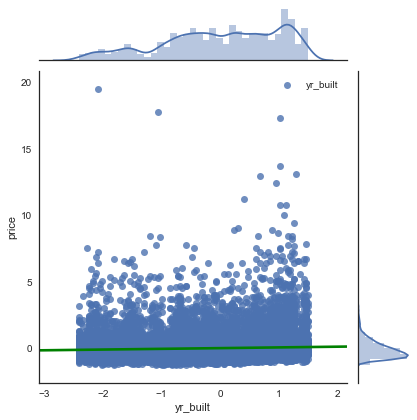

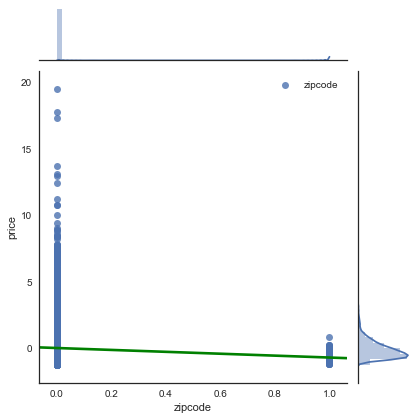

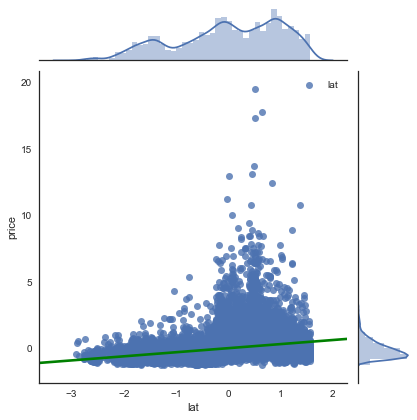

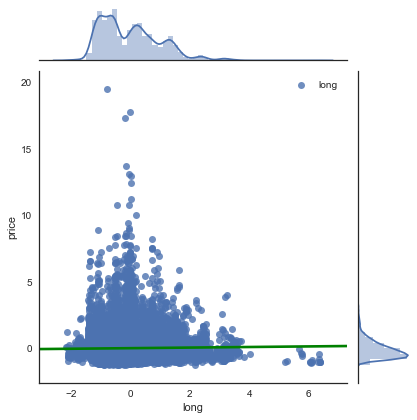

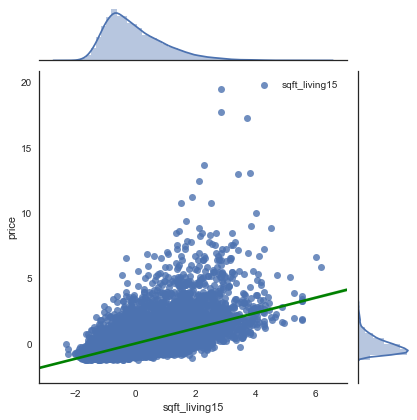

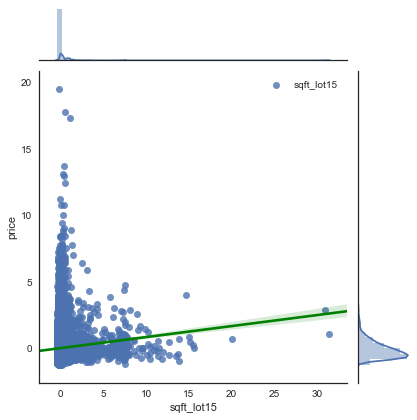

In [114]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=hd, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})

    plt.legend()
    plt.show()

Do newer houses have more bathrooms per bedroom? 

In [118]:
hd["bath_per_bedroom"] = hd.bathrooms/hd.bedrooms #ratio of bath to bedroom,
hd["bath_per_bedroom"].head()





0    3.528255
1   -0.424259
2    0.956318
3    1.654873
4    0.366244
Name: bath_per_bedroom, dtype: float64

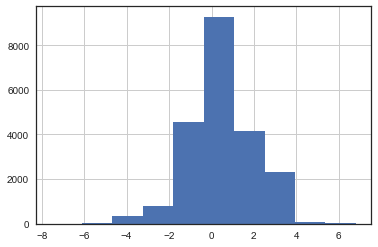

In [119]:
hd["bath_per_bedroom"].hist() # check  

In [122]:
hd["bath_per_bedroom"].mode()

0    0.719043
dtype: float64

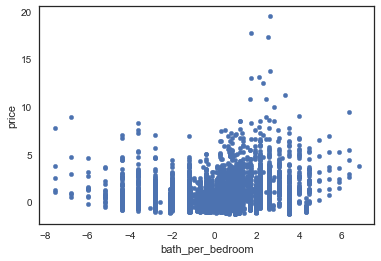

In [120]:
hd.plot(kind='scatter',x= "bath_per_bedroom", y="price")

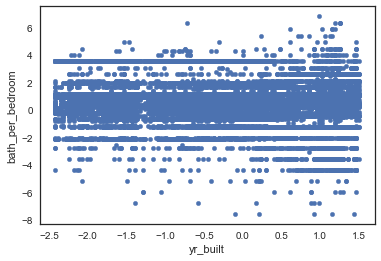

In [124]:
hd.plot(kind='scatter',x= "yr_built", y="bath_per_bedroom")

In [123]:
hd.yr_built.head()

0   -0.544665
1   -0.680835
2   -1.293596
3   -0.204243
4    0.544688
Name: yr_built, dtype: float64

In [128]:
sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x="long", y="lat",
                     hue="year", size="price",
                     palette=cmap, sizes=(10, 200),
                     data= hd)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [ ]:
Time_series = pd.DataFrame({'top 90th percentile':hd.price.quantile(.9).cumsum(),
                    'All houses':np.random.randn(365).cumsum() + 25,
                    'B':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))
data.head()

Model: building and tuning models using scikit learn and statsmodel regression packages 

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/griffinstein/anaconda3/envs/python3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [137]:
data_ols = pd.read_csv("kc_house_data.csv_cleaned")


In [134]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum 

In [138]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2619.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        18:36:11   Log-Likelihood:                -17731.
No. Observations:               21596   AIC:                         3.550e+04
Df Residuals:                   21576   BIC:                         3.566e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2502      0.017     14.758      0.000       0.217       0.283
id                -3.24e-12   1.32e-12     -2.455      0.014   -5.83e-12   -6.54e-13
bedrooms            -0.1014      0.005    -20.672      0.000      -0.111      -0.092
bathrooms            0.1243      0.007     17.620      0.000       0.110       0.138
sqft_living          0.3840      0.015     25.804      0.000       0.355       0.413
sqft_lot             0.0148      0.005      2.720      0.007       0.004       0.025
floors               0.0178      0.005      3.314      0.001       0.007       0.028
waterfront           0.1584      0.004     40.780      0.000       0.151       0.166
view                -0.2940      0.014    -20.727      0.000      -0.322      -0.266
condition            0.0519      0.004     12.650      0.000       0.044       0.060
grade                0.3160      0.007     45.508      0.000       0.302       0.330
sqft_above           0.0369      0.015      2.520      0.012       0.008       0.066
sqft_basement        0.0137      0.013      1.015      0.310      -0.013       0.040
yr_built            -0.2084      0.006    -37.883      0.000      -0.219      -0.198
zipcode             -0.0437      0.030     -1.444      0.149      -0.103       0.016
lat                  0.2077      0.004     50.974      0.000       0.200       0.216
long                -0.0442      0.005     -9.504      0.000      -0.053      -0.035
sqft_living15        0.0552      0.006      8.571      0.000       0.043       0.068
sqft_lot15          -0.0305      0.005     -5.569      0.000      -0.041      -0.020
bath_per_bedroom     0.0424      0.003     15.895      0.000       0.037       0.048
==============================================================================
Omnibus:                    18311.126   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1806722.193
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      47.241   Cond. No.                     4.37e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""